In [3]:
import quandl
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn import preprocessing
import seaborn as sns


In [55]:
df = pd.read_csv('ShanghaiPM20100101_20151231.csv', usecols=['year', 'month','day','hour','HUMI','PRES','Iws','Iprec'])
df['Dates'] =  pd.to_datetime(df.iloc[:,0:4])
df = df.drop(columns=['year', 'month','day','hour'])


In [56]:
df2 = df.drop_duplicates()
df2 = df2.dropna()

df2 = df2.resample('1D', on='Dates').mean()
df = df.resample('1D', on='Dates').mean()

df2 = df2.interpolate(method='time', limit_direction = 'forward') 


In [57]:
df2 = df2.rolling(10).mean()
df2.to_csv('asd2.csv')
df.to_csv('asd1.csv')

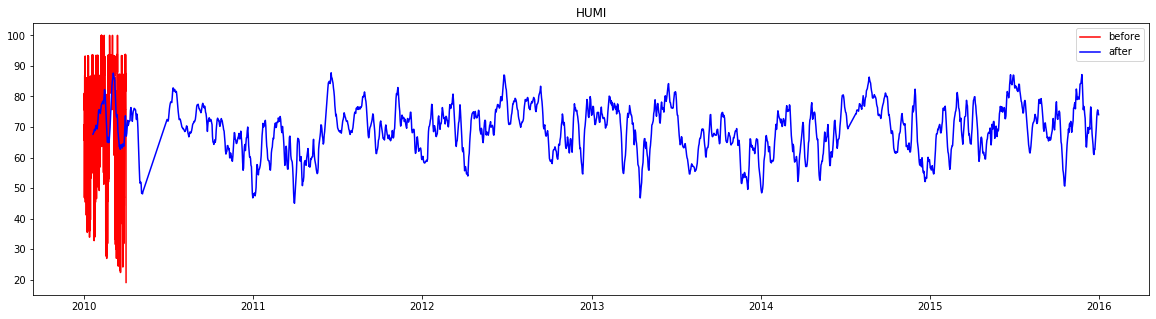

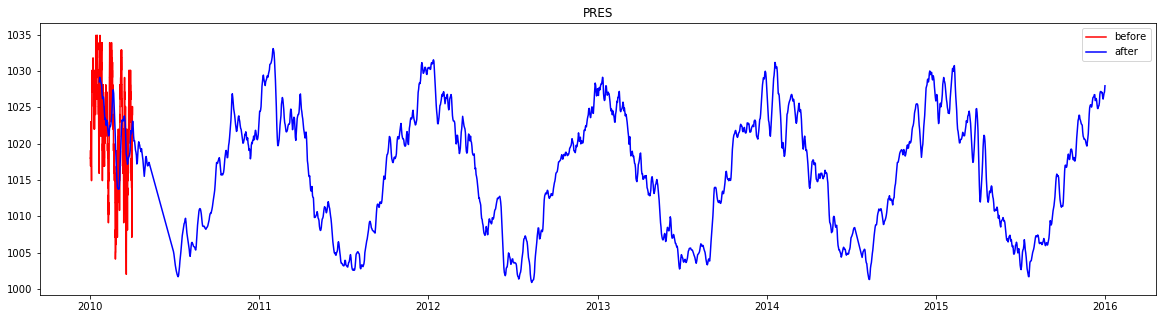

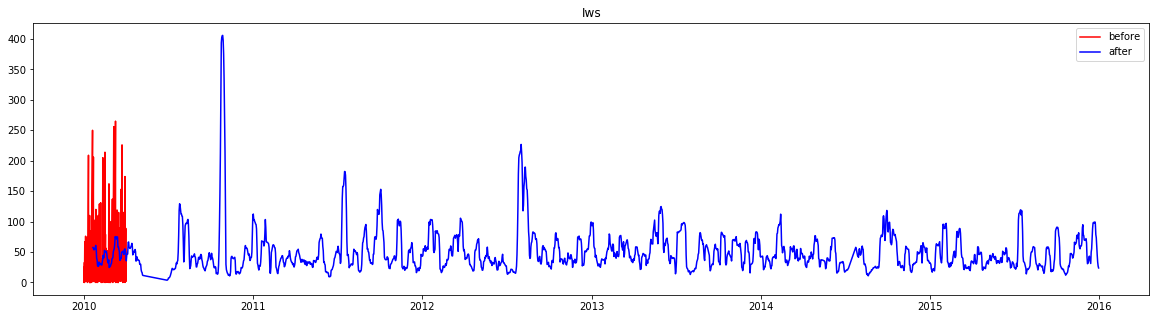

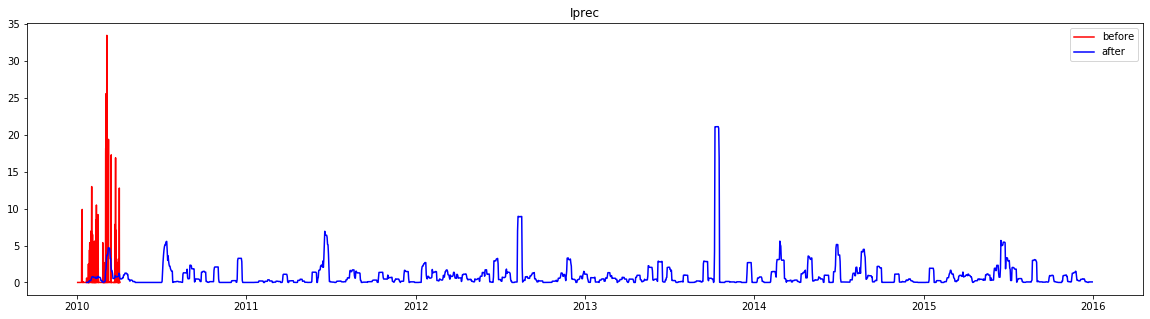

In [52]:
plt.figure(figsize =(20,5))
plt.plot(df.iloc[20:2197,0:1], color = 'r')
plt.plot(df2.iloc[20:2197,0:1], color = 'b')
plt.legend(labels = ['before', 'after'])
plt.title('HUMI')
plt.show()
plt.figure(figsize =(20,5))
plt.plot(df.iloc[20:2197,1:2], color = 'r')
plt.plot(df2.iloc[20:2197,1:2], color = 'b')
plt.legend(labels = ['before', 'after'])
plt.title('PRES')
plt.show()
plt.figure(figsize =(20,5))
plt.plot(df.iloc[20:2197,2:3], color = 'r')
plt.plot(df2.iloc[20:2197,2:3], color = 'b')
plt.legend(labels = ['before', 'after'])
plt.title('Iws')
plt.show()
plt.figure(figsize =(20,5))
plt.plot(df.iloc[20:2197,3:4], color = 'r')
plt.plot(df2.iloc[20:2197,3:4], color = 'b')
plt.legend(labels = ['before', 'after'])
plt.title('Iprec')
plt.show()

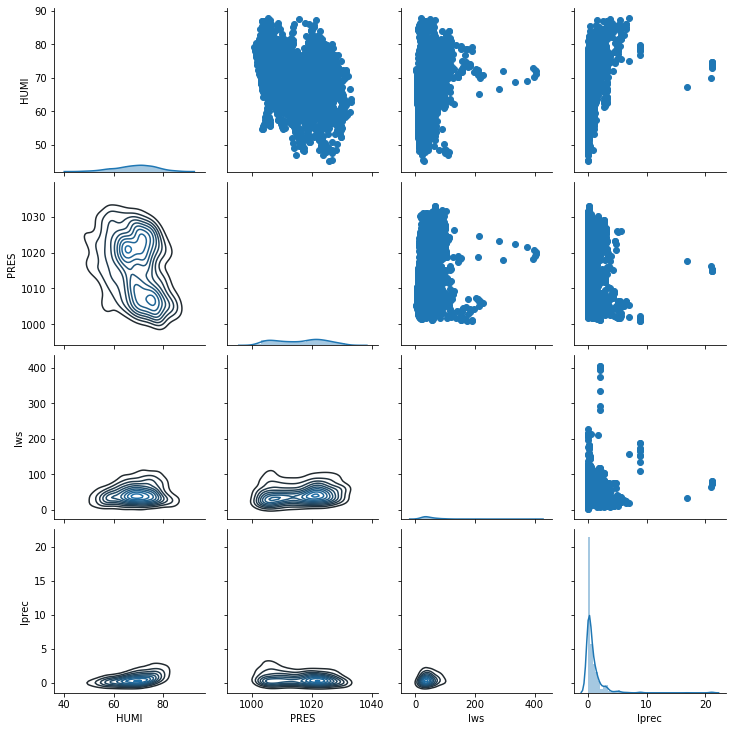

In [24]:
g = sns.PairGrid(df2)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.distplot)

In [25]:
df2=(df2-df2.min())/(df2.max()-df2.min())

In [26]:
stridedf = pd.concat(
    [  
        df.iloc[z:z+5] 
    for z in range(0,df.shape[0]-1,4)
    ]   
)

In [27]:
stridedf.to_csv('asd2.csv')